In [21]:
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('..'))
from models import timoshenko_model as model
from scripts import root_finder as rf
import matplotlib.pyplot as plt

In [33]:

def det_global_stiffness_matrix(G1, E1, I1, rho1, A1, L1, G2, E2, I2, rho2, A2, L2, omega, kappa=5/6):
    k_global = np.zeros((6, 6), dtype=complex)

    k_e1 = model.timoshenko_model(G1, E1, I1, rho1, A1, omega, L1)
    k_e2 = model.timoshenko_model(G2, E2, I2, rho2, A2, omega, L2)

    # Assembly
    k_global[0:4, 0:4] += k_e1
    k_global[2:6, 2:6] += k_e2

    k_global_restrained = k_global[2:, 2:]
    det_global_restrained = np.abs(np.linalg.det(k_global_restrained))
    return det_global_restrained

E1, E2 = 210e9, 210e9
G1, G2 = 81e9, 81e9
I1, I2 = (0.02*0.05**3)/12, (0.02*0.05**3)/12
rho1, rho2 = 780, 7800
A1, A2 = 0.05*0.02, 0.05*0.02
L1, L2 = 0.5, 0.5

roots = rf.find_all_roots(lambda omega: det_global_stiffness_matrix(G1, E1, I1, rho1, A1, L1, G2, E2, I2, rho2, A2, L2, omega), 2500, 3000, step=0.01, tol=1e-6)


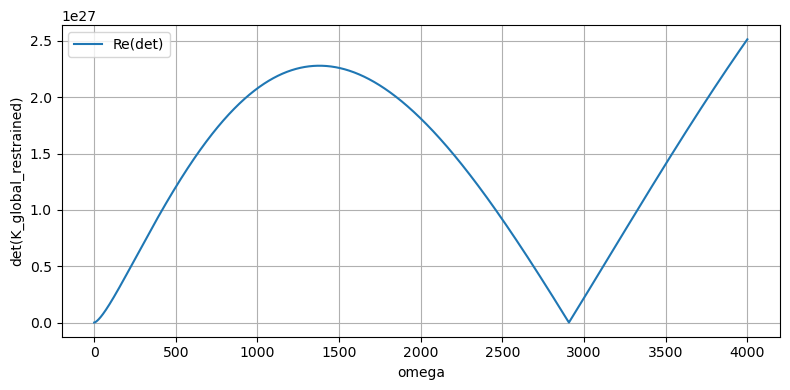

In [34]:
omega_vals = np.linspace(1e-3, 4000, 2000)
det_vals = [det_global_stiffness_matrix(G1, E1, I1, rho1, A1, L1, G2, E2, I2, rho2, A2, L2, om) for om in omega_vals]

plt.figure(figsize=(8, 4))
plt.plot(omega_vals, det_vals, label="Re(det)")

plt.xlabel("omega")
plt.ylabel("det(K_global_restrained)")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [30]:
roots

[]